This illustrates how to do a radial simulation. I haven't played with this much yet.

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/bryan/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [13]:
import seaborn as sns

In [14]:
import pandas as pd

In [15]:
sns.set_context('paper', font_scale=2.2)
sns.set_style('ticks')

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import rough_front_expansion.cython as rfe

In [18]:
import skimage as ski
import skimage.morphology

In [31]:
nx = 300 # width
ny = 300 # max height

num_strains = 2

ic_lattice = -1*np.ones((nx, ny), dtype=np.int32)

r, c = ski.draw.circle(nx/2, ny/2, 10)

# Let's inoculate random IC's in each pixel.

ic_lattice[r, c] = np.random.randint(0, 2, size=r.shape[0])

v = np.array([1.0, 1.05], dtype=np.float)

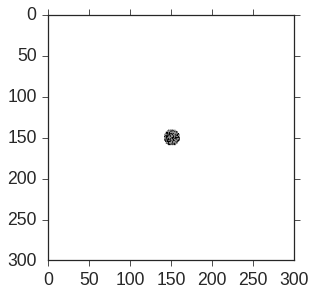

In [32]:
plt.imshow(ic_lattice)

In [33]:
# Testing how it looks

seed = np.random.randint(2**32 - 1)

sim = rfe.Rough_Front(nx=nx, ny=ny, num_strains=2, v=v, ic=ic_lattice, seed=seed, debug=False)

In [34]:
sim.run(sim.max_iterations/4.)

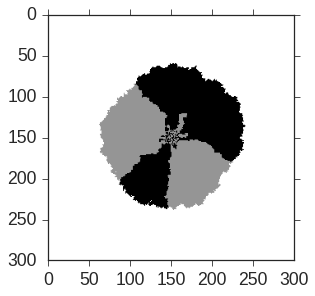

In [35]:
plt.imshow(sim.lattice)

Indeed, using the four-point lattice results in rather extreme artifacts. But, it looks relatively legit, actually quite like a real simulation.

In [36]:
import rough_front_expansion.utility as uti

In [51]:
wall_df = uti.get_wall_df(sim, 0, 1, expansion_size=1, single_sector=False)

(80.0, 240.0, 80.0, 240.0)

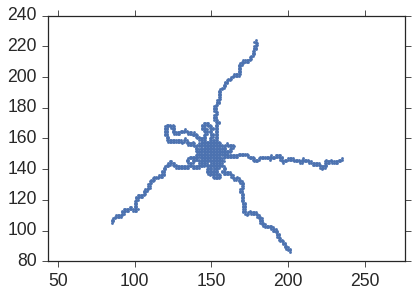

In [54]:
plt.plot(wall_df['r'], wall_df['c'], ls='', marker='.')
plt.axis('equal')

So indeed the walls are located. I haven't put in the work to extract them precisely and track them vs. radius yet though.